In [1]:
import pandas as pd

In [2]:
import numpy as n

In [3]:
file_path = "walmart_sales_data.csv"


In [5]:
walmart_data = pd.read_csv(r'C:\Users\Naren\OneDrive\Desktop\Hash include\project wal\walmart_sales_data.csv')

In [6]:
print(walmart_data.head())

  Store ID  Week        Date   Department     Sales  Temperature  Fuel Price  \
0  Store_8    11  2024-03-16  Electronics  34546.46        71.69        4.55   
1  Store_9    14  2024-04-02     Pharmacy  28695.47        79.30        4.19   
2  Store_6    13  2024-03-28    Furniture   8009.55        32.91        3.73   
3  Store_1     8  2024-02-25     Pharmacy  31890.72        41.85        4.87   
4  Store_5     6  2024-02-05    Groceries  47097.04        32.39        4.36   

  Holiday  
0     Yes  
1      No  
2     Yes  
3      No  
4     Yes  


In [7]:
print(walmart_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Store ID     150 non-null    object 
 1   Week         150 non-null    int64  
 2   Date         150 non-null    object 
 3   Department   150 non-null    object 
 4   Sales        150 non-null    float64
 5   Temperature  150 non-null    float64
 6   Fuel Price   150 non-null    float64
 7   Holiday      150 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 9.5+ KB
None


In [8]:
print(walmart_data.describe())

             Week         Sales  Temperature  Fuel Price
count  150.000000    150.000000   150.000000  150.000000
mean     8.186667  26695.329867    65.471000    3.749400
std      4.104976  13167.205782    21.191352    0.673971
min      1.000000   5317.410000    30.210000    2.540000
25%      5.000000  15065.662500    46.885000    3.150000
50%      8.000000  27825.670000    66.315000    3.780000
75%     12.000000  37313.090000    85.675000    4.317500
max     15.000000  49417.080000    99.670000    4.970000


In [9]:
missing_values = walmart_data.isnull().sum()

In [10]:
print("Missing Values:\n", missing_values)

Missing Values:
 Store ID       0
Week           0
Date           0
Department     0
Sales          0
Temperature    0
Fuel Price     0
Holiday        0
dtype: int64


In [11]:
# Convert 'Date' column to datetime
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'], errors='coerce')

In [12]:
# Verify date conversion
print("Date Conversion Successful:\n", walmart_data['Date'].head())


Date Conversion Successful:
 0   2024-03-16
1   2024-04-02
2   2024-03-28
3   2024-02-25
4   2024-02-05
Name: Date, dtype: datetime64[ns]


In [13]:
# Add Weekly Average Sales for each store
walmart_data['Weekly Avg Sales'] = walmart_data.groupby('Store ID')['Sales'].transform('mean')

In [14]:
# Add Cumulative Sales for each store
walmart_data['Cumulative Sales'] = walmart_data.groupby('Store ID')['Sales'].cumsum()

In [15]:
# Add Season based on month
def season_from_month(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

walmart_data['Season'] = walmart_data['Date'].dt.month.apply(season_from_month)


In [16]:
# Preview the updated dataset
print("Feature Engineering Completed:\n", walmart_data.head())


Feature Engineering Completed:
   Store ID  Week       Date   Department     Sales  Temperature  Fuel Price  \
0  Store_8    11 2024-03-16  Electronics  34546.46        71.69        4.55   
1  Store_9    14 2024-04-02     Pharmacy  28695.47        79.30        4.19   
2  Store_6    13 2024-03-28    Furniture   8009.55        32.91        3.73   
3  Store_1     8 2024-02-25     Pharmacy  31890.72        41.85        4.87   
4  Store_5     6 2024-02-05    Groceries  47097.04        32.39        4.36   

  Holiday  Weekly Avg Sales  Cumulative Sales  Season  
0     Yes      30168.659167          34546.46  Spring  
1      No      20732.876875          28695.47  Spring  
2     Yes      21162.950000           8009.55  Spring  
3      No      33094.280833          31890.72  Winter  
4     Yes      29954.978125          47097.04  Winter  


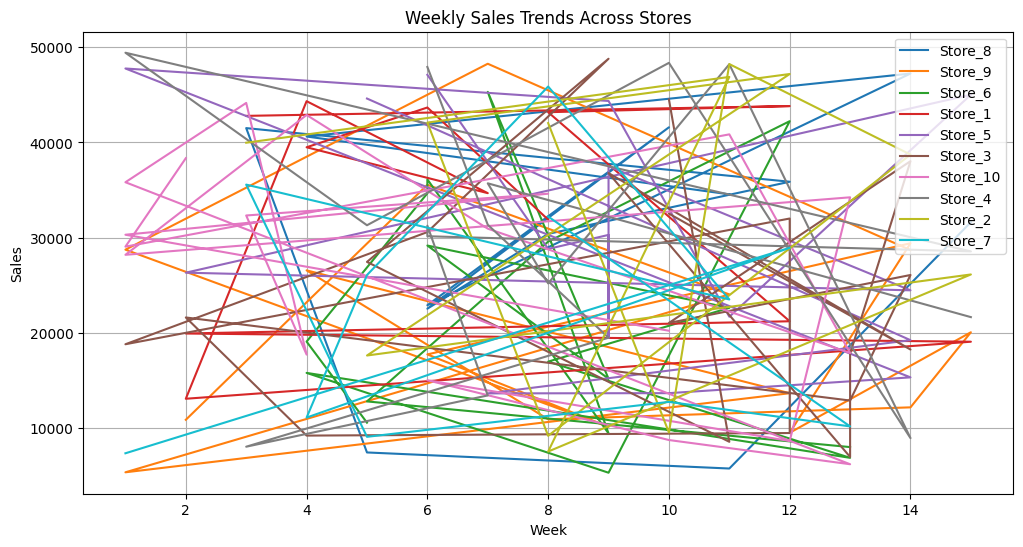

In [17]:
import matplotlib.pyplot as plt

# Plot sales trends
stores = walmart_data['Store ID'].unique()

plt.figure(figsize=(12, 6))
for store in stores:
    store_data = walmart_data[walmart_data['Store ID'] == store]
    plt.plot(store_data['Week'], store_data['Sales'], label=store)

plt.title('Weekly Sales Trends Across Stores')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [20]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\Naren\AppData\Local\Temp\ipykernel_10484\2037900257.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=walmart_data, x='Holiday', y='Sales', palette='Set2')


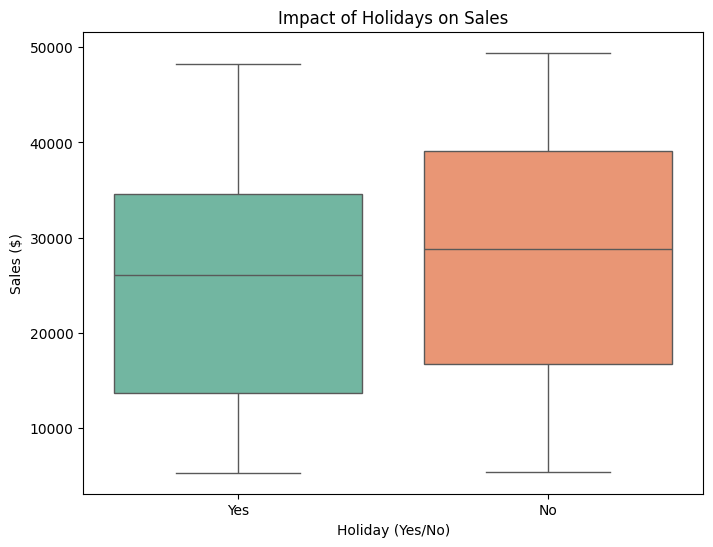

In [21]:
# Boxplot for holiday impact
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=walmart_data, x='Holiday', y='Sales', palette='Set2')
plt.title('Impact of Holidays on Sales')
plt.xlabel('Holiday (Yes/No)')
plt.ylabel('Sales ($)')
plt.show()


C:\Users\Naren\AppData\Local\Temp\ipykernel_10484\2361701181.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=walmart_data, x='Season', y='Sales', palette='pastel', order=['Winter', 'Spring', 'Summer', 'Fall'])


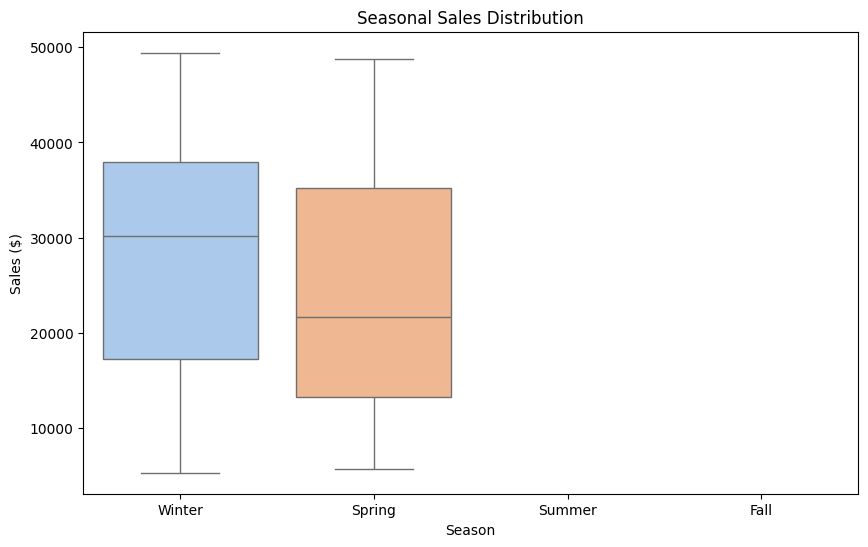

In [22]:
# Boxplot for seasonal sales
plt.figure(figsize=(10, 6))
sns.boxplot(data=walmart_data, x='Season', y='Sales', palette='pastel', order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title('Seasonal Sales Distribution')
plt.xlabel('Season')
plt.ylabel('Sales ($)')
plt.show()


In [24]:
pip install scikit-learn


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 4.2 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/11.0 MB 2.1 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/11.0 MB 1.9 MB/s eta 0:00:06
   ---- ----------------------------------- 1.3/11.0 MB 1.5 MB/s eta 0:00:07
   ----- ---------------------------------- 1.6/11.0 MB 1.5 MB/s eta 0:00:07
   ------ --------------------------------- 1.8/11.0 MB 1.4 MB/s eta 0:00:07
   ------ --------------------------------- 1.8/11.0 MB 1.4 MB/s eta 0:00:07
   ------- -------------------------------- 2.1/11.0 MB 1.2 MB/s eta 0:00:08
   ------- -------------------------------- 2.1/11.0 MB 1.2 MB/s eta 0:00:08
   ------- -------------------------------- 2.1/11.0 MB 1.2 MB/s eta 0:00:08
   ------- -------------------------------- 2.1/11.0 MB 1.2 MB/s eta 0:00:08
   ------- -------------------------------- 2.1/11.0 MB 1.2 MB/s eta 0:00:08
   ---


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\Naren\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\Users\Naren\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\Naren\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\Naren\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^

In [28]:
from sklearn.preprocessing import LabelEncoder

# Assume 'Churn' column exists for prediction; if not, simulate for example:
# Walmart does not have churn data; simulate churn status for demonstration
np.random.seed(42)
walmart_data['Churn'] = np.random.choice(['Yes', 'No'], size=len(walmart_data), p=[0.3, 0.7])

# Encode categorical columns
categorical_cols = ['Store ID', 'Department', 'Holiday', 'Season', 'Churn']
encoder = LabelEncoder()

for col in categorical_cols:
    walmart_data[col] = encoder.fit_transform(walmart_data[col])

# Feature and target separation
X = walmart_data.drop(columns=['Churn', 'Date'])
y = walmart_data['Churn']

# Display encoded dataset preview
print("Feature Engineering Complete. Encoded Data Preview:\n", walmart_data.head())


ModuleNotFoundError: No module named 'sklearn'